In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import librosa 
from dataset import WavDataset
from config import *
import matplotlib.pyplot as plt

import h5py
from pathlib import Path
from config import *
import pickle

In [47]:
df = pd.read_csv("../../output/correlations/templates.csv")
df

,name,low,high,start,end,site,deployment,recording
0,jagged_trill,4632.640000,6148.420000,4:40:513,4:41:646,1,9,1_20240214_070000.wav
1,m_syllable_old_3khz,1434.230000,3546.850000,199.29,199.716,1,11,1_20240214_193000.wav
2,yawn_1-13khz,1180.330000,12657.500000,253.246000000,253.661333333,1,11,1_20240221_060000.wav
3,step,1792.200000,4810.450000,347.253333333,347.829333333,1,?,?
4,triangle_3khz,1202.470337,4831.221191,383.488842,384.138452,1,1,1_20230316_063000.wav
5,nr_syllable_3khz,2000.000000,3840.000000,166.476,166.968,1,9,1_20231130_050000.wav
6,fast_trill_6khz,5531.000000,10125.000000,267.624,268.848,1,9,1_20231130_053000.wav
7,upsweep_500hz,205.691620,617.953796,210.889618,211.595210,1,10,1_20231223_063000.wav
8,m_syllable_3khz,1467.490000,3587.740000,194.992000000,195.754666667,1,10,1_20231223_063000.wav


In [56]:
df = df.set_index(['name'])
df

,low,high,start,end,site,deployment,recording
name,,,,,,,
jagged_trill,4632.640000,6148.420000,4:40:513,4:41:646,1,9,1_20240214_070000.wav
m_syllable_old_3khz,1434.230000,3546.850000,199.29,199.716,1,11,1_20240214_193000.wav
yawn_1-13khz,1180.330000,12657.500000,253.246000000,253.661333333,1,11,1_20240221_060000.wav
step,1792.200000,4810.450000,347.253333333,347.829333333,1,?,?
triangle_3khz,1202.470337,4831.221191,383.488842,384.138452,1,1,1_20230316_063000.wav
nr_syllable_3khz,2000.000000,3840.000000,166.476,166.968,1,9,1_20231130_050000.wav
fast_trill_6khz,5531.000000,10125.000000,267.624,268.848,1,9,1_20231130_053000.wav
upsweep_500hz,205.691620,617.953796,210.889618,211.595210,1,10,1_20231223_063000.wav
m_syllable_3khz,1467.490000,3587.740000,194.992000000,195.754666667,1,10,1_20231223_063000.wav


In [61]:
low, high, start, end, site, depl, rec =  df.loc['m_syllable_3khz']

In [62]:
import librosa


ds = WavDataset()
y, sr = librosa.load(ds[rec])
y = y[int((float(start) - 2) *sr):int((float(end) + 2)*sr)]
y = librosa.resample(y, orig_sr=sr, target_sr=16_000)
S = librosa.stft(y)
S_db = librosa.power_to_db(S)

/tmp/ipykernel_4568/3058261575.py:9: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  S_db = librosa.power_to_db(S)


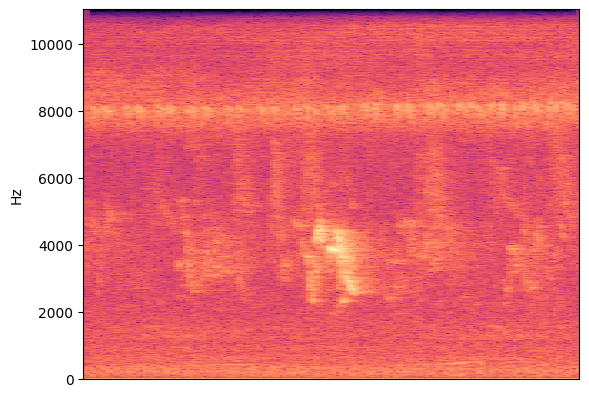

In [63]:
librosa.display.specshow(S_db, y_axis='linear')

In [64]:
from IPython.display import Audio, display

display(Audio(data=y, rate=sr))